## import libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

## data processing

### major individual data

In [8]:
df_major = pd.read_csv('df_major_NCES.csv')

In [9]:
df_major.head()

,Field,1971,1976,1981,1986,1991,1996,2001,2006,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Agriculture and natural resources,12674,19402,21886,17191,13363,21757,23766,23497,31629,34304,35953,37028,37827,38782,40334,41373,41858,41925
1,Architecture and related services,5570,9146,9455,9119,9781,8352,8480,9515,9727,9757,9149,9090,8825,8579,8464,8806,9045,9296
2,Biological and biomedical sciences,35705,54154,43078,38395,39482,61014,60576,70602,95850,100397,104657,109904,113794,116768,118661,121233,126616,131499
3,Communications technologies,478,1237,1854,1479,1397,853,1178,2987,4983,4987,4991,5135,4824,4615,4231,4444,4424,4557
4,Computer and information sciences and support ...,2388,5652,15121,42337,25159,24506,44142,47702,47406,50961,55271,59586,64402,71416,79597,88638,97054,104874


In [10]:
df_major_long = pd.melt(df_major, id_vars = 'Field', var_name = 'Year', value_name = 'NofDegrees')

In [11]:
df_major_long['Year'] = df_major_long['Year'].astype('int')

### major grand total data

In [12]:
df_major_grand = pd.read_csv('df_major_NCES_grand.csv', header = None)

In [13]:
df_major_grand_T = df_major_grand.T
df_major_grand_T.columns = df_major_grand_T.iloc[0]
df_major_grand_T = df_major_grand_T[1:]

In [14]:
df_major_grand_T['Year'] = df_major_grand_T['Year'].astype('int')

In [15]:
df_major_grand_T['GrandTotal'] = df_major_grand_T['GrandTotal'].astype('int')

### historical income data

In [17]:
df_hist_gini = pd.read_csv('df_historic_income_inequality.csv')

### master data

#### master data

In [18]:
df_master_temp = df_major_long.merge(df_major_grand_T, on = 'Year')

In [19]:
df_master = df_master_temp.merge(df_hist_gini, on = 'Year' ) 

In [20]:
df_master.drop('Year_og', axis = 1, inplace = True)

In [21]:
df_master['PercentDegree'] = df_master['NofDegrees']/df_master['GrandTotal']*100

#### field data and major data for virsualization & statistical analysis

In [22]:
df_master_field = df_master[df_master['Field'].isin(['STEM','Business','Education', 'Humanities and Arts', 'Social Science','Multidisciplinary'])]

df_master_field['Field_coded'] = df_master_field['Field'].replace({'STEM': 0, 
                                                                   'Humanities and Arts': 1, 
                                                                   'Business': 2, 
                                                                   'Education': 3, 
                                                                   'Social Science': 4,
                                                                   'Multidisciplinary': 5})

/var/folders/r9/fw5bm81j1h72ff0690bt25x80000gn/T/ipykernel_60106/2837452426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_field['Field_coded'] = df_master_field['Field'].replace({'STEM': 0,


In [23]:
df_master_field.to_csv('df_major_NCES_master.csv')

In [24]:
df_master_all_major = df_master[~df_master['Field'].isin(['STEM','Business','Education', 
                                                          'Humanities and Arts', 
                                                          'Social Science','Multidisciplinary'])]

## virsualization

### Year vs. Gini & Grand Total

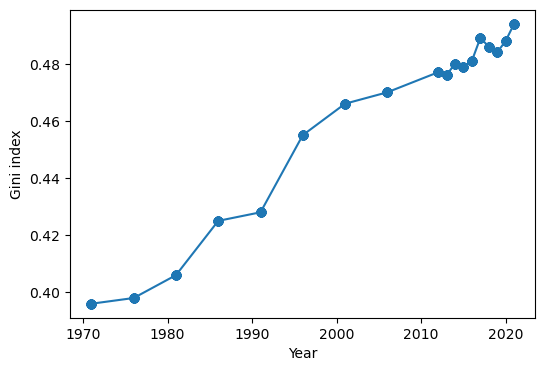

In [25]:
plt.figure(figsize = (6,4))

plt.plot(df_master['Year'], df_master['Gini'], marker='o')
plt.xlabel('Year')
plt.ylabel('Gini index')

plt.show()

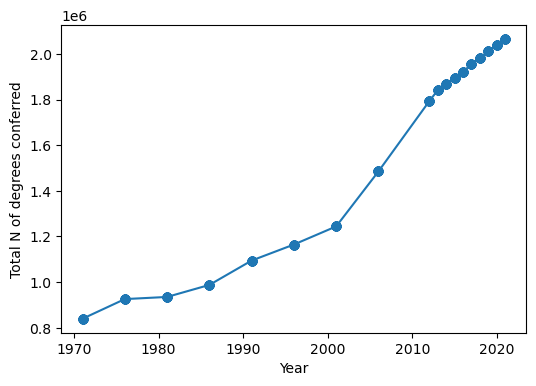

In [26]:
plt.figure(figsize = (6,4))

plt.plot(df_master['Year'], df_master['GrandTotal'], marker='o')

plt.xlabel('Year')
plt.ylabel('Total N of degrees conferred')

plt.show()

### Gini * Major (STEM vs. Humanities)

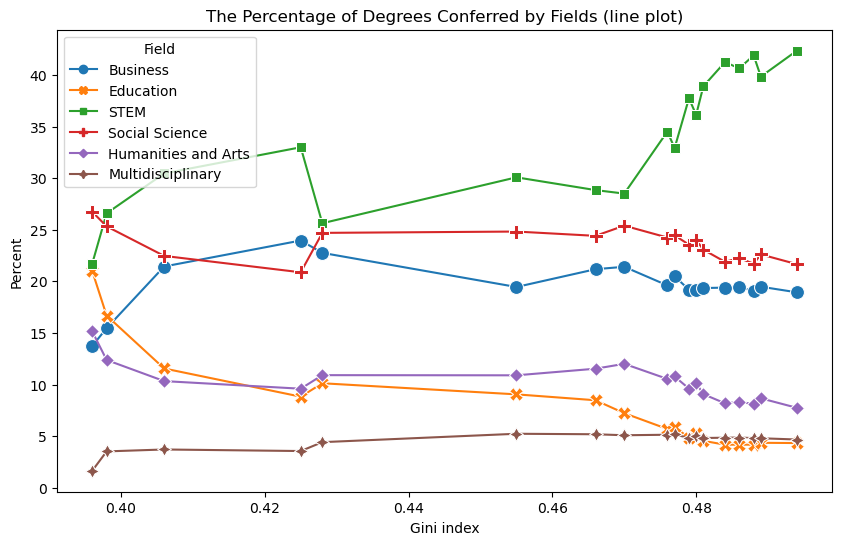

In [27]:
plt.figure(figsize = (10,6))

sns.lineplot(data = df_master_field, 
             x = "Gini", y = "PercentDegree", 
             hue = "Field",
             #hue_order = [],
             style = 'Field', markers = True, markersize = 10, dashes = False)

plt.xlabel('Gini index')
plt.ylabel('Percent')
plt.title("The Percentage of Degrees Conferred by Fields (line plot)")

plt.show()

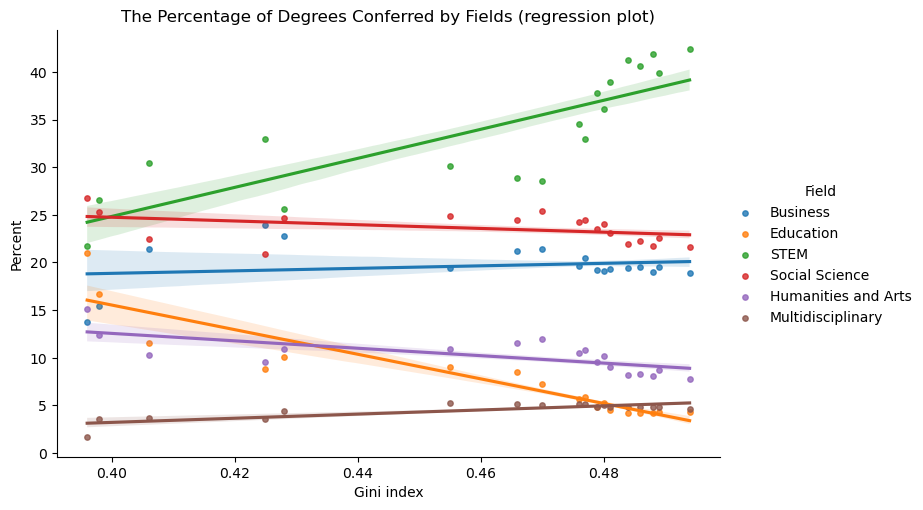

In [28]:
sns.lmplot(x = "Gini", y = "PercentDegree", 
           data = df_master_field, 
           hue = "Field", scatter = True, scatter_kws={"s": 15}, ci = 68,
           height = 5, aspect = 1.5)

plt.xlabel('Gini index')
plt.ylabel('Percent')
plt.title("The Percentage of Degrees Conferred by Fields (regression plot)")

plt.show()

### Gini * Major (All Majors)

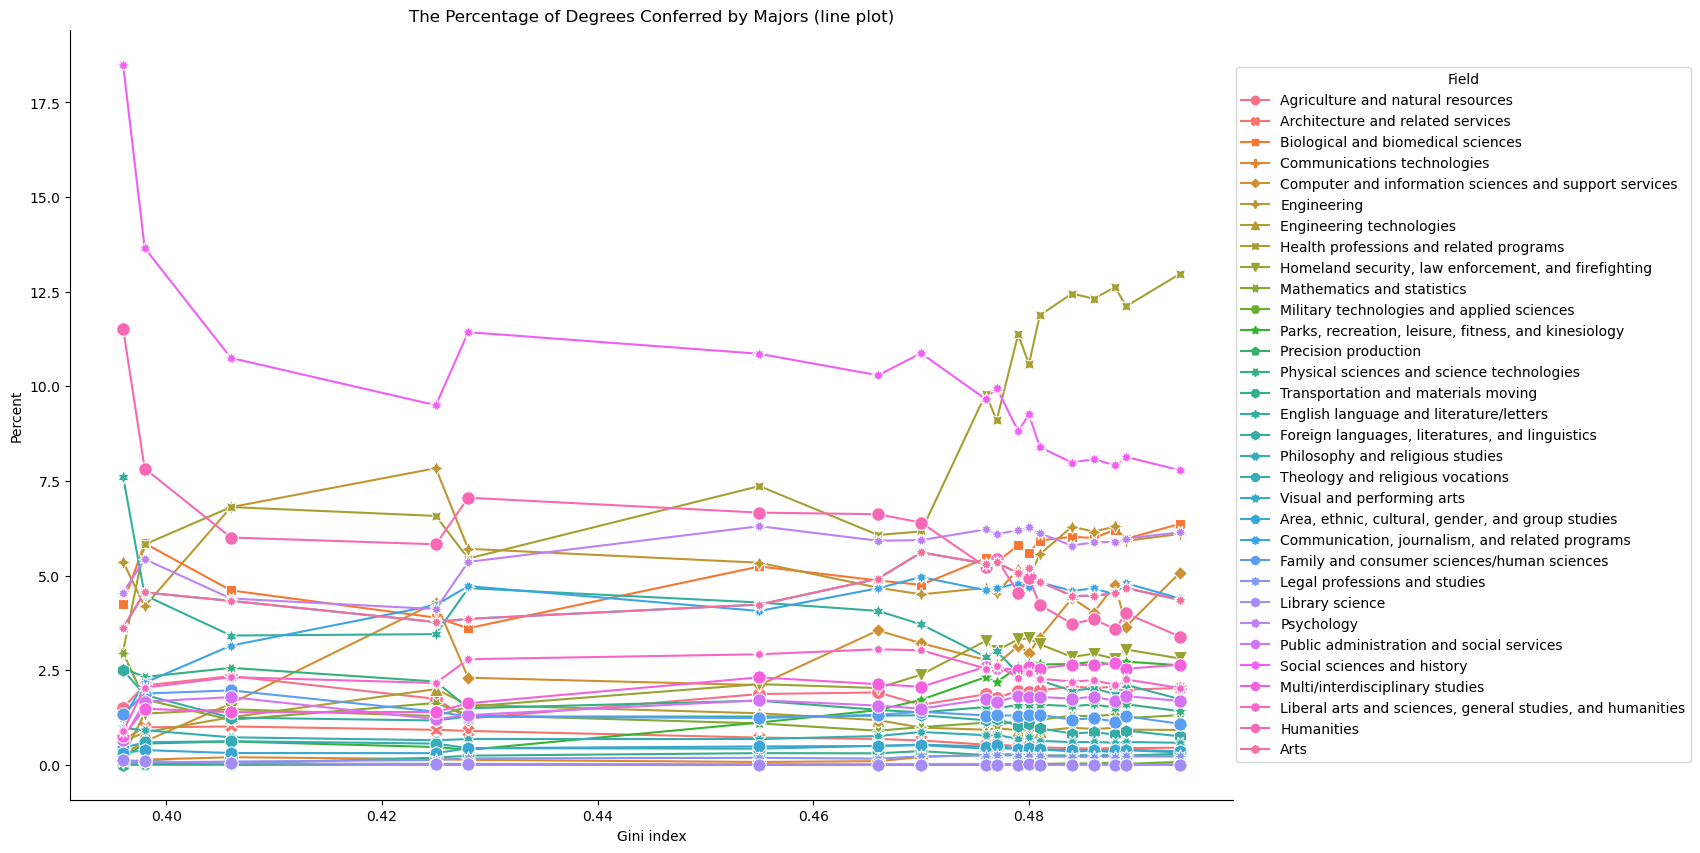

In [45]:
plt.figure(figsize = (15,10))

ax = sns.lineplot(data = df_master_all_major, 
             x = "Gini", y = "PercentDegree", 
             hue = "Field",
             style = 'Field', markers = True, markersize = 10, dashes = False)

sns.despine()


sns.move_legend(ax, 'center right', bbox_to_anchor=(1.4, 0.5))

plt.xlabel('Gini index')
plt.ylabel('Percent')
plt.title("The Percentage of Degrees Conferred by Majors (line plot)")

plt.show()

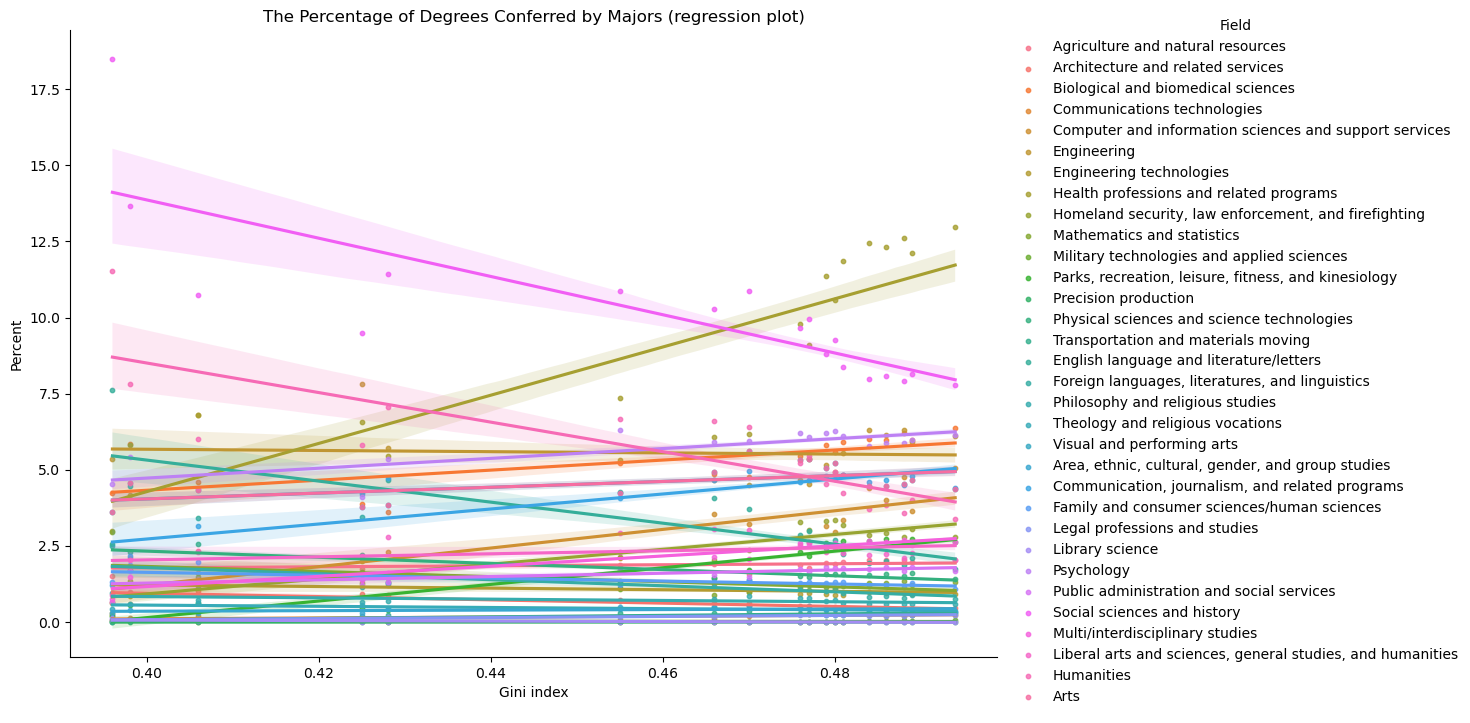

In [48]:
sns.lmplot(x = "Gini", y = "PercentDegree", 
           data = df_master_all_major, 
           hue = "Field", scatter = True, scatter_kws={"s": 10}, ci = 68,
           height = 7, aspect = 1.5)

plt.xlabel('Gini index')
plt.ylabel('Percent')
plt.title("The Percentage of Degrees Conferred by Majors (regression plot)")

plt.show()